In [1]:
import keras
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D,Activation,Dropout, Flatten, Dense
from keras.optimizers import Adam,SGD
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import json
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
batch_size = 32
weight = 160
height = 120

In [3]:
vgg16_model = VGG16(include_top=False,weights='imagenet',input_shape=(weight,height,3))

58892288/58889256 [==============================] - 356s 6us/step


In [5]:
import pickle
with open('vgg_16_model.pkl','wb') as f:
    pickle.dump(vgg16_model,f)

In [6]:
#### design the ouput layers that connect to vgg16 model:
top_model = Sequential()
top_model.add(Flatten(input_shape = vgg16_model.output_shape[1:]))
top_model.add(Dense(256,activation = 'relu'))
top_model.add(Dropout(0.6))
top_model.add(Dense(10,activation='softmax'))
model = Sequential()
model.add(vgg16_model)
model.add(top_model)

In [7]:
generator_config = ImageDataGenerator(
    rescale=1/255)

In [8]:
### data generator
test_generator = generator_config.flow_from_directory(
    directory='test/',
    target_size=(weight,height),
    batch_size=32)

Found 480 images belonging to 10 classes.


In [10]:
### data generator
train_generator = generator_config.flow_from_directory(
    directory='train/',
    target_size=(weight,height),
    batch_size=32)

Found 21953 images belonging to 10 classes.


In [11]:
label2code = train_generator.class_indices

In [12]:
code2label = dict(zip(label2code.values(),label2code.keys()))

In [13]:
#### write the dict at json file
with open('code2label_driver.json','w',encoding='utf-8') as f:
    json.dump(code2label,f)

In [14]:
model.compile(optimizer=SGD(lr=1e-3,momentum=0.9),loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
callbacks = [keras.callbacks.TensorBoard(log_dir='log_dir_driver')]

In [16]:
batch_fetch_train_times = train_generator.n//batch_size

In [17]:
batch_fetch_test_times = test_generator.n//batch_size

In [18]:
train_generator.n

21953

In [20]:
batch_fetch_train_times

686

In [21]:
# model.fit_generator(generator = train_generator, steps_per_epoch = batch_fetch_times,
#                     epochs=5,callbacks=callbacks)
model.fit_generator(generator = train_generator, steps_per_epoch = batch_fetch_train_times,
                    epochs=5,callbacks=callbacks, validation_data=test_generator,
                    validation_steps=batch_fetch_test_times)

Epoch 1/5
686/686 [==============================] - 238s 347ms/step - loss: 1.5296 - acc: 0.4360 - val_loss: 0.1906 - val_acc: 0.9250
Epoch 2/5
686/686 [==============================] - 235s 342ms/step - loss: 0.1586 - acc: 0.9555 - val_loss: 0.0391 - val_acc: 0.9896
Epoch 3/5
686/686 [==============================] - 234s 342ms/step - loss: 0.0644 - acc: 0.9820 - val_loss: 0.0095 - val_acc: 0.9979
Epoch 4/5
686/686 [==============================] - 236s 344ms/step - loss: 0.0301 - acc: 0.9915 - val_loss: 0.0230 - val_acc: 0.9896
Epoch 5/5
686/686 [==============================] - 236s 344ms/step - loss: 0.0302 - acc: 0.9913 - val_loss: 0.0415 - val_acc: 0.9917


In [22]:
# pip install h5py
model.save('model_vgg16_driver.h5')

In [23]:
code2status = {
"c0": 'safe driving',
'c1': 'texting - right',
'c2': 'talking on the phone - right',
'c3': 'texting - left',
'c4': 'talking on the phone - left',
'c5': 'operating the radio',
'c6': 'drinking',
'c7': 'reaching behind',
'c8': 'hair and makeup',
'c9': 'talking to passenger'
}

In [24]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array,load_img
import json
import numpy as np
import matplotlib.pyplot as plt

In [25]:
file = open('code2label_driver.json','r',encoding='utf-8')
label = json.load(file)

# 载入模型
model = load_model('model_vgg16_driver.h5')

In [26]:
def predict(image):
    # 导入图片
    image = load_img(image)
    plt.imshow(image)
    image = image.resize((height,weight))
    image = img_to_array(image)
    image = image/255
    image = np.expand_dims(image,0)   
    plt.title('The driver is '+code2status[label[str(model.predict_classes(image)[0])]])
    plt.axis('off')
    plt.show()

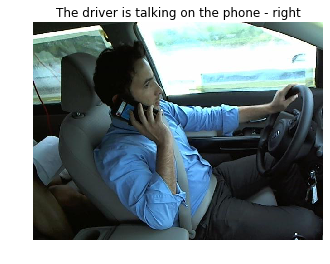

In [27]:
predict('predict_data/img_13.jpg')

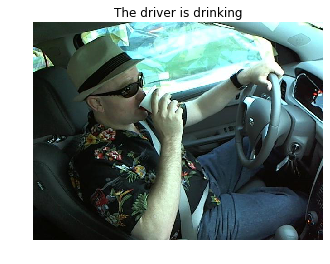

In [28]:
predict('predict_data/img_329.jpg')

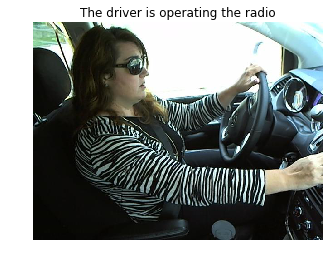

In [29]:
predict('predict_data/img_46633.jpg')

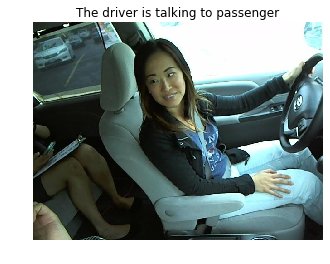

In [30]:
predict('predict_data/img_51867.jpg')

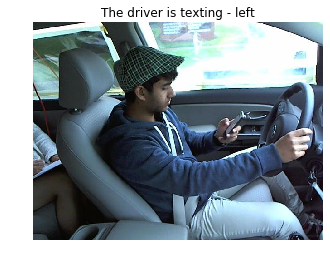

In [31]:
predict('predict_data/img_51885.jpg')